In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
# Reading the Dataset
df = pd.read_csv('movies.csv')

In [91]:
# First 5 rows of the dataset
df.head()

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,1.0,The Godfather,(1972),R,175 min,"Crime, Drama",9.2,"1,860,471",$134.97M
1,2.0,The Silence of the Lambs,(1991),R,118 min,"Crime, Drama, Thriller",8.6,"1,435,344",$130.74M
2,3.0,Star Wars: Episode V - The Empire Strikes Back,(1980),PG,124 min,"Action, Adventure, Fantasy",8.7,"1,294,805",$290.48M
3,4.0,The Shawshank Redemption,(1994),R,142 min,Drama,9.3,"2,683,302",$28.34M
4,5.0,The Shining,(1980),R,146 min,"Drama, Horror",8.4,"1,025,560",$44.02M


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            99 non-null     float64
 1   movie_name       99 non-null     object 
 2   year_of_release  99 non-null     object 
 3   category         99 non-null     object 
 4   run_time         99 non-null     object 
 5   genre            99 non-null     object 
 6   imdb_rating      99 non-null     float64
 7   votes            99 non-null     object 
 8   gross_total      98 non-null     object 
dtypes: float64(2), object(7)
memory usage: 7.1+ KB


In [93]:
df.describe()

,index,imdb_rating
count,99.000000,99.000000
mean,50.000000,8.348485
std,28.722813,0.368772
min,1.000000,7.200000
25%,25.500000,8.100000
50%,50.000000,8.300000
75%,74.500000,8.600000
max,99.000000,9.300000


In [94]:
# checking for Null values
df.isnull().sum()

index              0
movie_name         0
year_of_release    0
category           0
run_time           0
genre              0
imdb_rating        0
votes              0
gross_total        1
dtype: int64

# EDA Analysis

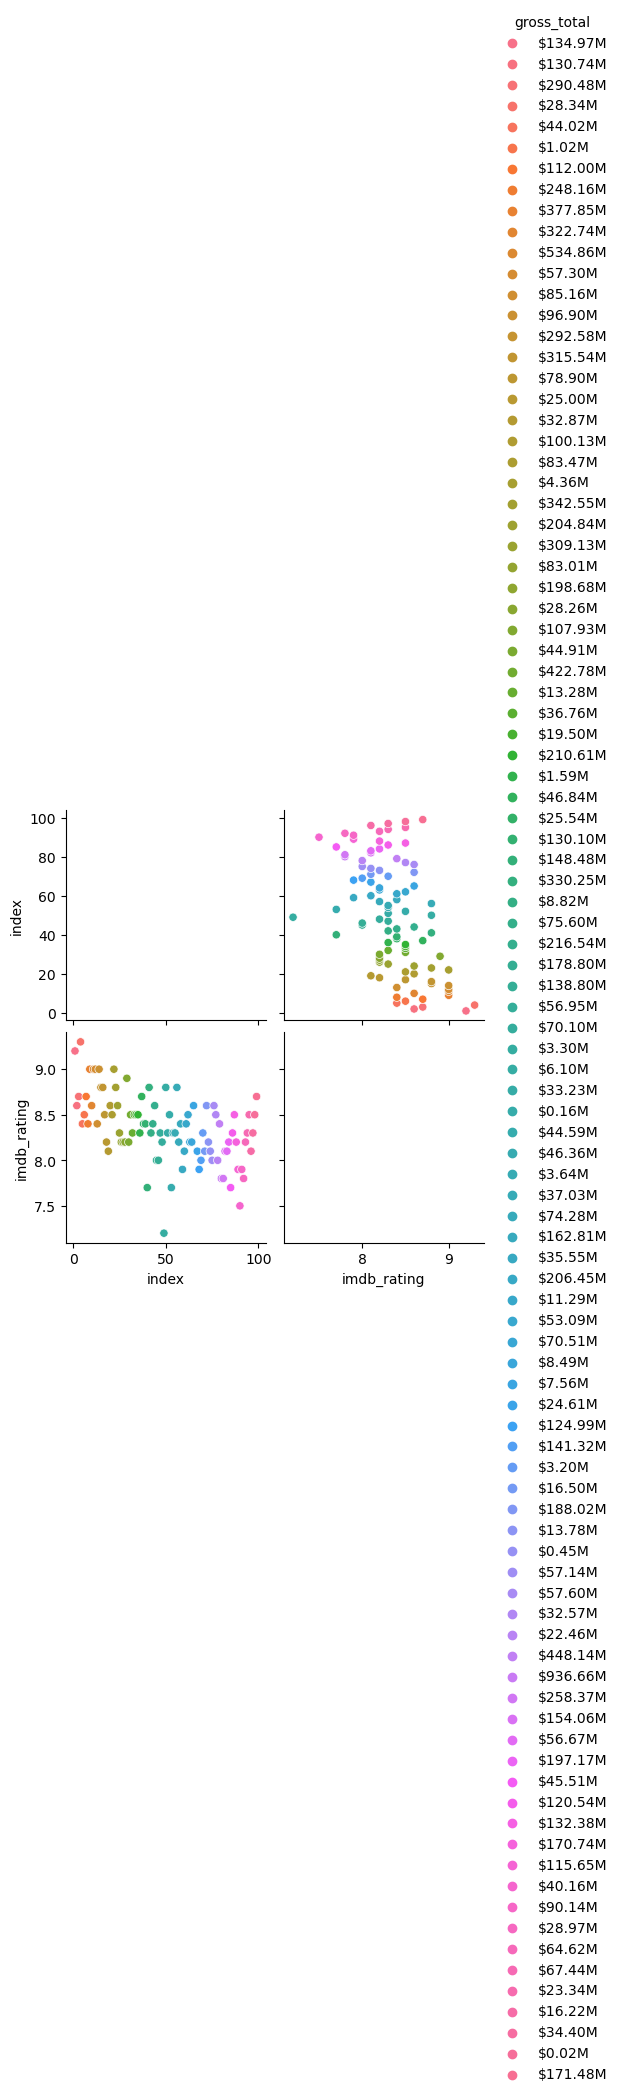

In [95]:
sns.pairplot(df,hue='gross_total')

array([<Axes: ylabel='category'>], dtype=object)

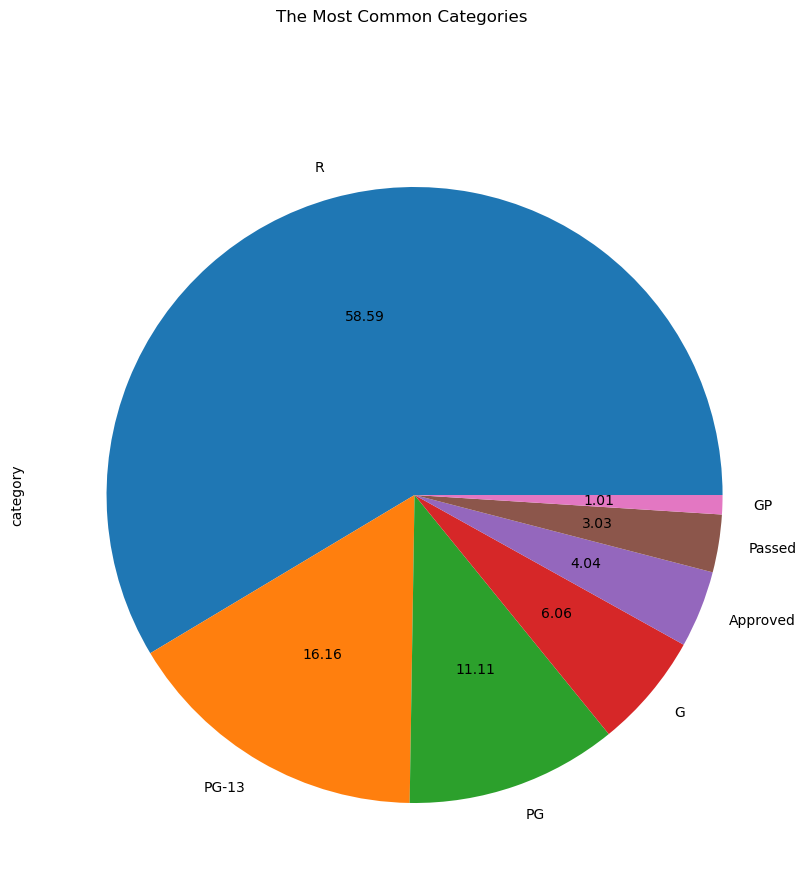

In [96]:
df['category'].value_counts().plot(kind='pie',subplots=True,autopct='%1.2f',figsize=(10,10),title='The Most Common Categories')

In [97]:
# Removing the '$' and 'M' from the values in gross_total column
df['gross_total'] = df['gross_total'].astype(str).str.lstrip('$').str.rstrip('M')

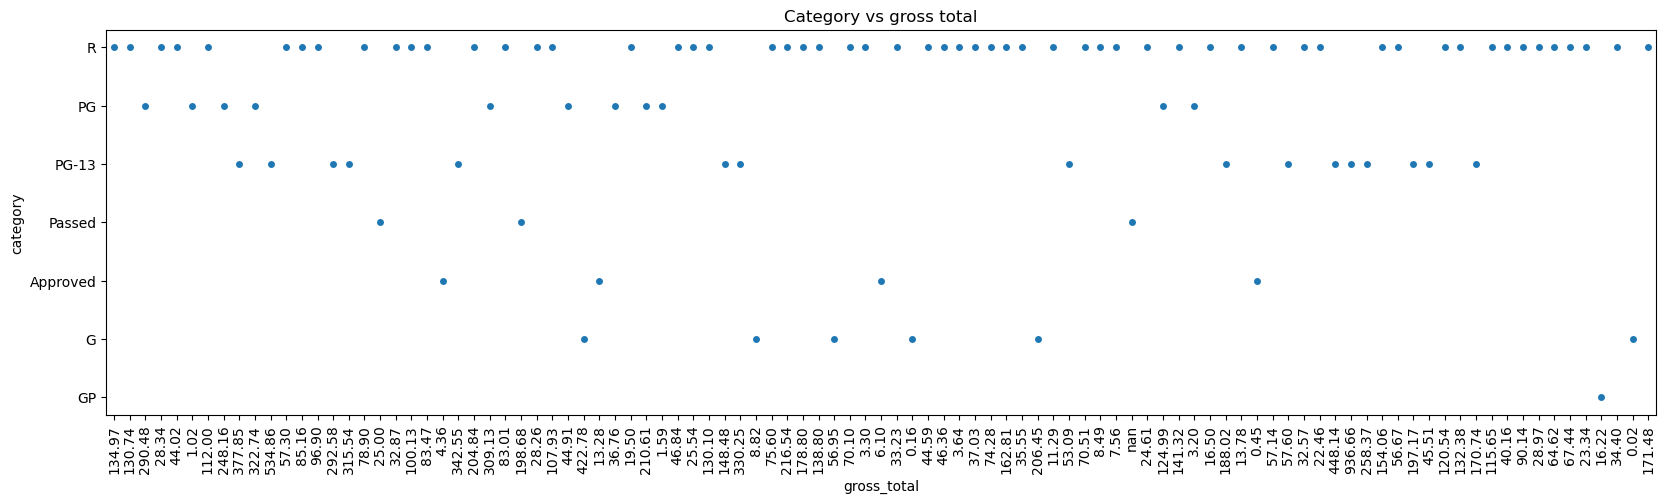

In [98]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation=90)
ax = sns.stripplot(y="category", x="gross_total", data=df).set(title='Сategory vs gross total')

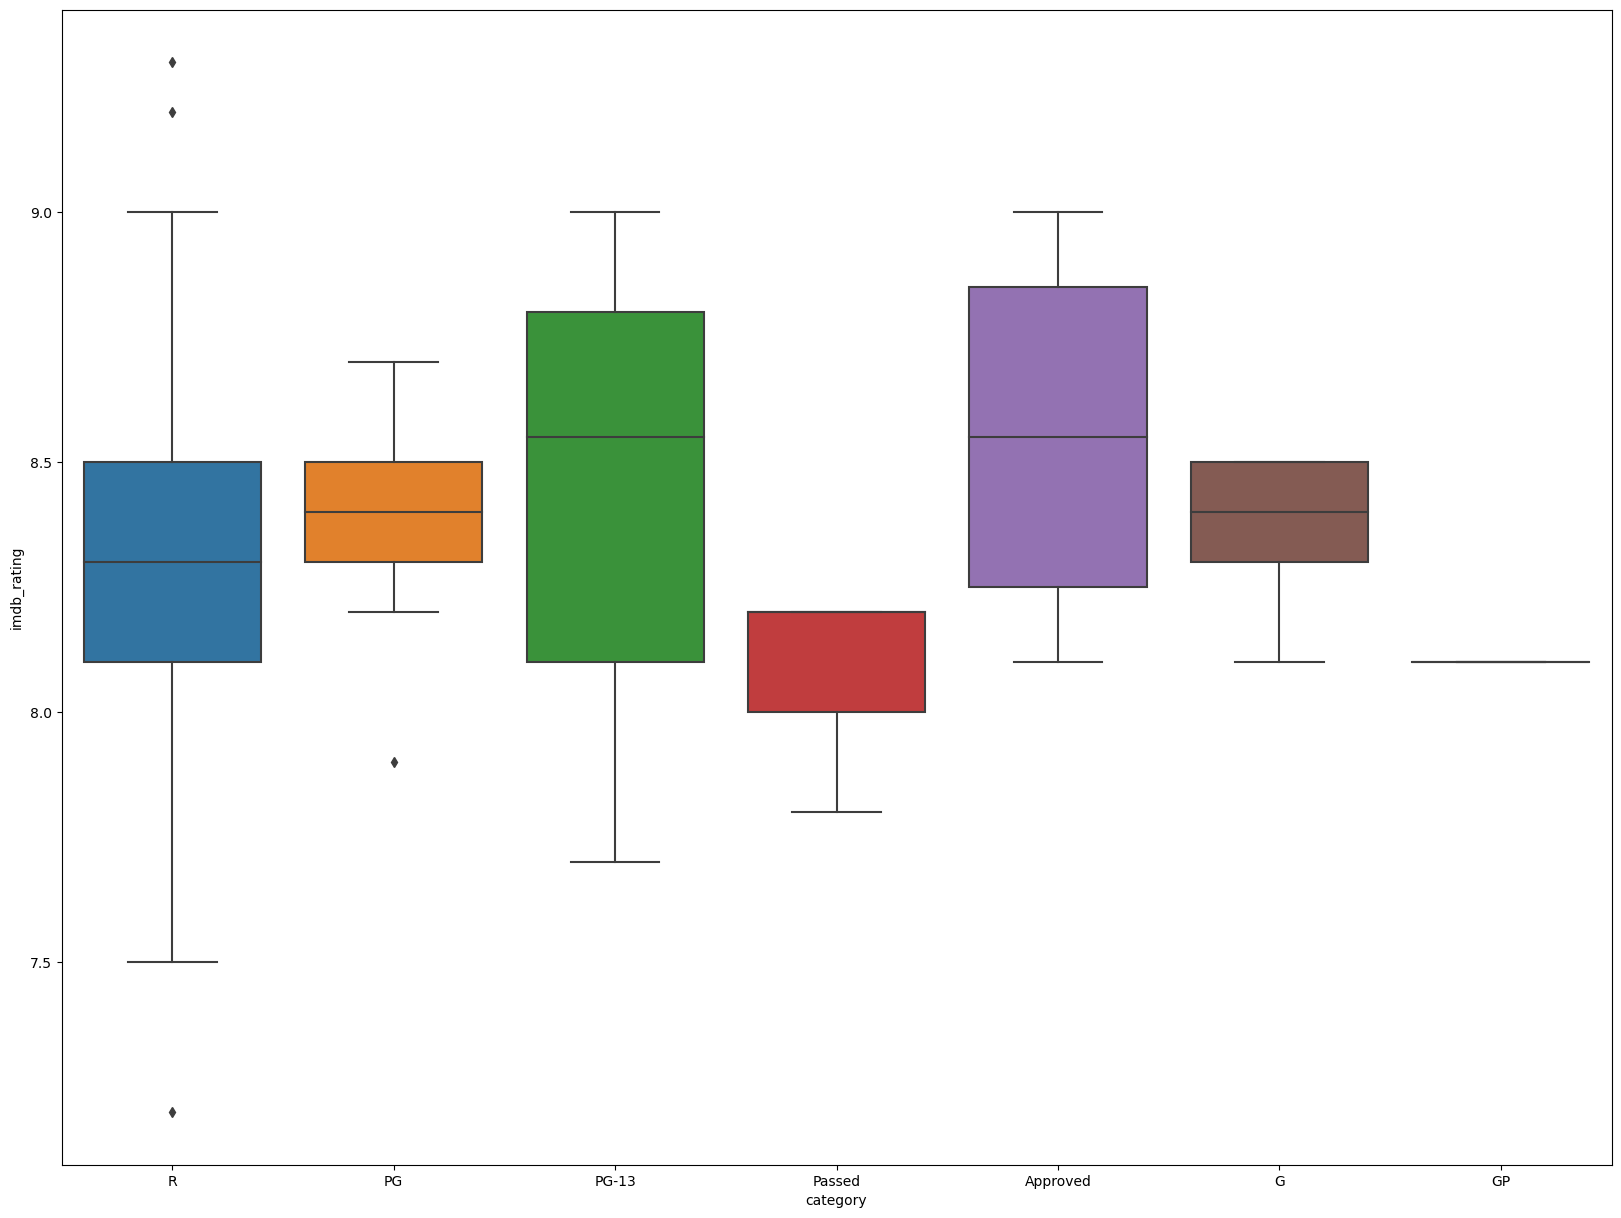

In [99]:
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.boxplot(x="category", y="imdb_rating", data=df)

# Most Common Genres

array([<Axes: ylabel='genre'>], dtype=object)

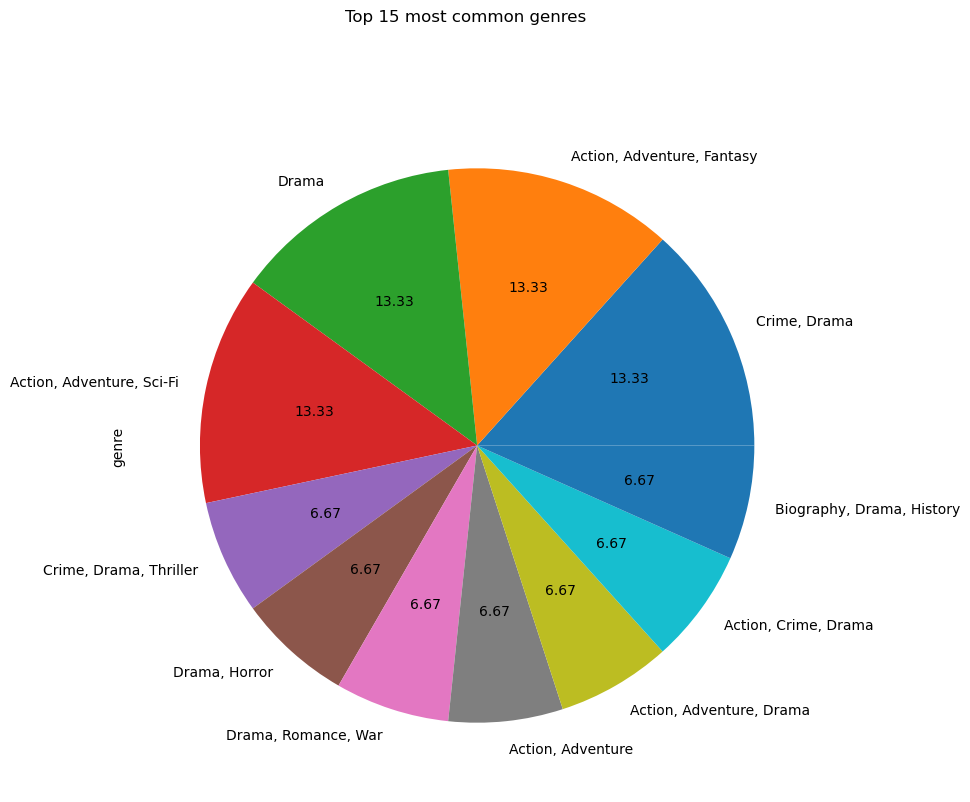

In [100]:
df['genre'].head(15).value_counts().plot(kind='pie', subplots=True, autopct='%1.2f',figsize=(9,9),title='Top 15 most common genres')

# Movies vs Ratings

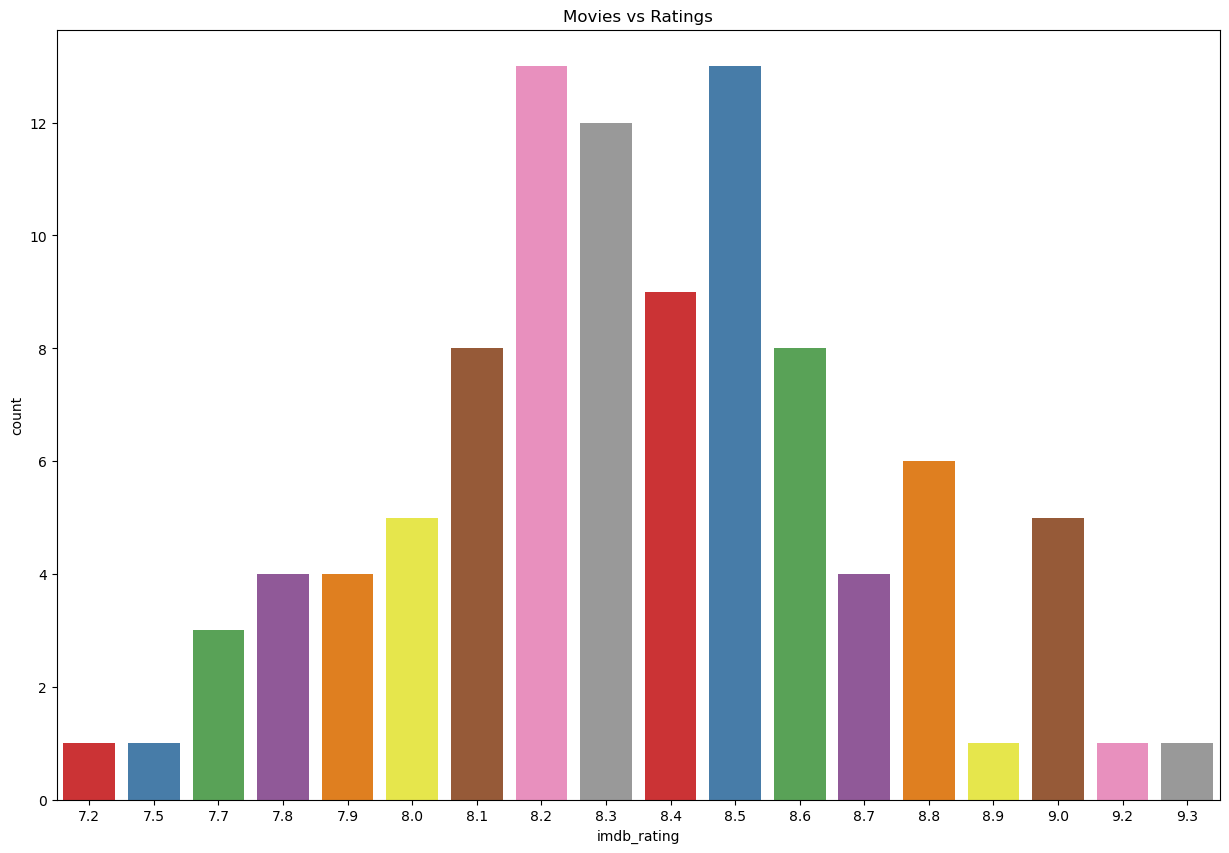

In [101]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x="imdb_rating",palette="Set1").set(title='Movies vs Ratings')
plt.show()

# Rating vs Gross Total

C:\Users\Hp\AppData\Local\Temp\ipykernel_5020\286353208.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(y="imdb_rating", x="gross_total", data=df, palette="Set1", s=10, marker="D", linewidth=1).set(title='Rating vs gross total')


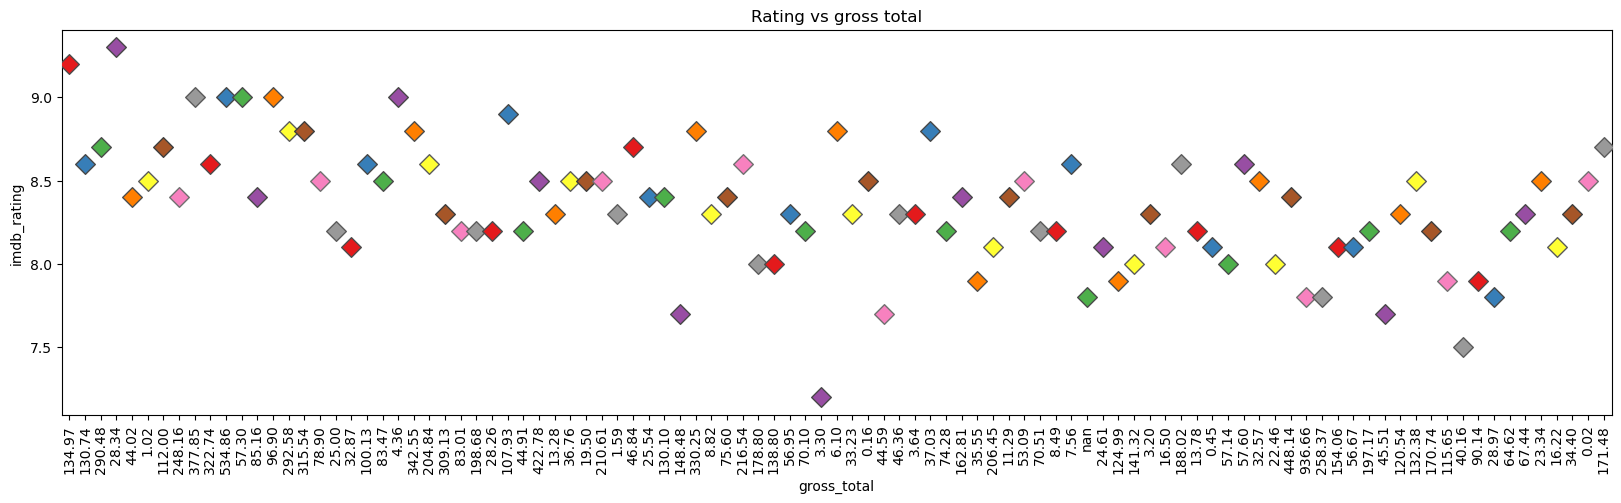

In [102]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation=90)
ax = sns.stripplot(y="imdb_rating", x="gross_total", data=df, palette="Set1", s=10, marker="D", linewidth=1).set(title='Rating vs gross total')

# Rating vs category

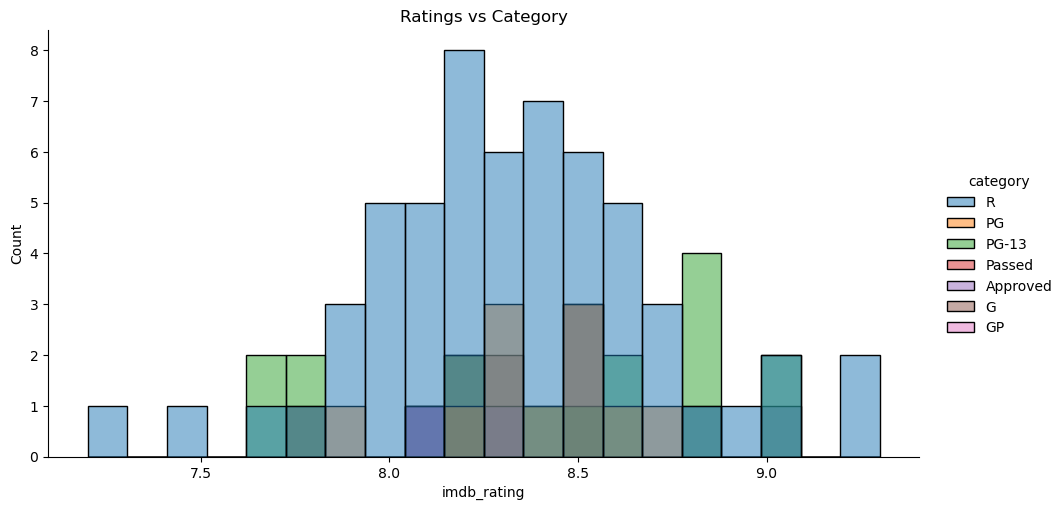

In [103]:
sns.displot(df, x='imdb_rating',bins=20, hue='category',aspect=1.9).set(title='Ratings vs Category')
plt.show()

In [104]:
df['year_of_release']=df['year_of_release'].str.replace('\(|\)','')

C:\Users\Hp\AppData\Local\Temp\ipykernel_5020\194521472.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['year_of_release']=df['year_of_release'].str.replace('\(|\)','')


C:\Users\Hp\AppData\Local\Temp\ipykernel_5020\3464005968.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["year_of_release"])


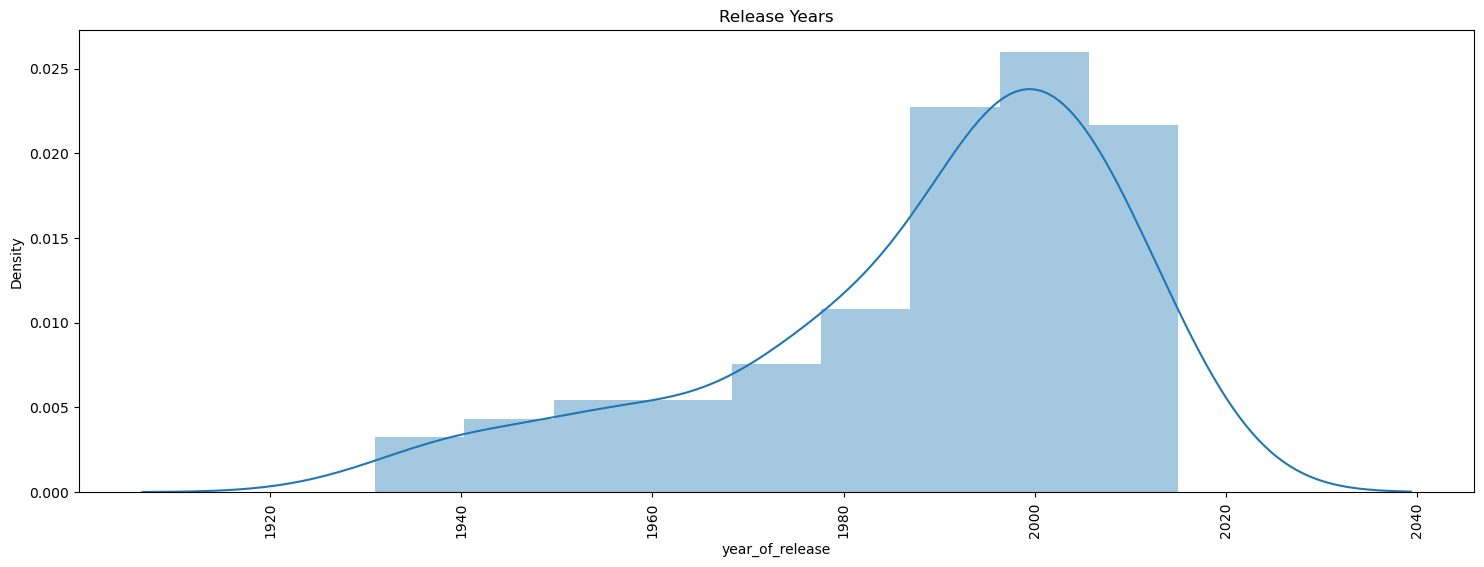

In [105]:
plt.figure(figsize=(18,6))
sns.distplot(df["year_of_release"])
plt.title("Release Years")
plt.xticks(rotation=90)
plt.show()

In [106]:
# Removing the 'min' from the runtime
df['run_time'] = df['run_time'].apply(lambda x: float(x.split()[0].replace('min','')))

# Runtime in minutes

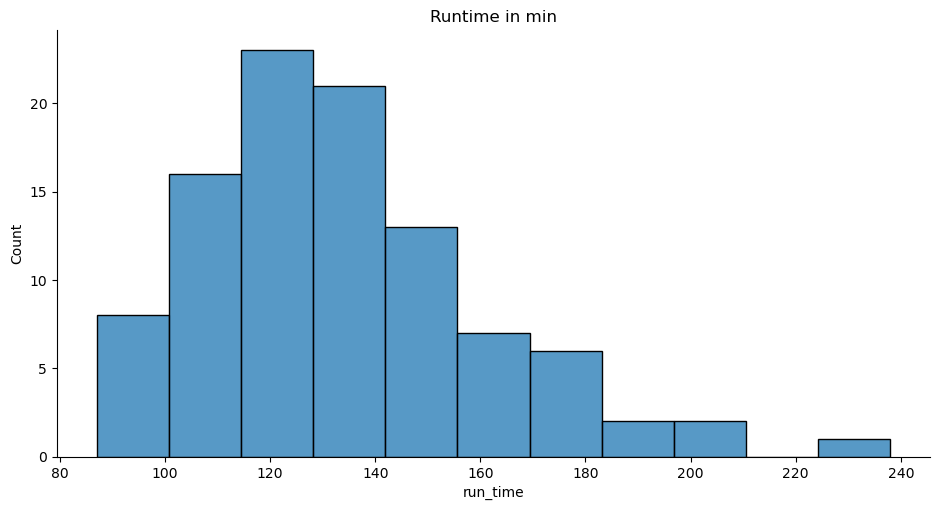

In [107]:
sns.displot(df, x= 'run_time', aspect=1.9)
plt.title("Runtime in min")
plt.show()

# Runtime vs Vote Average

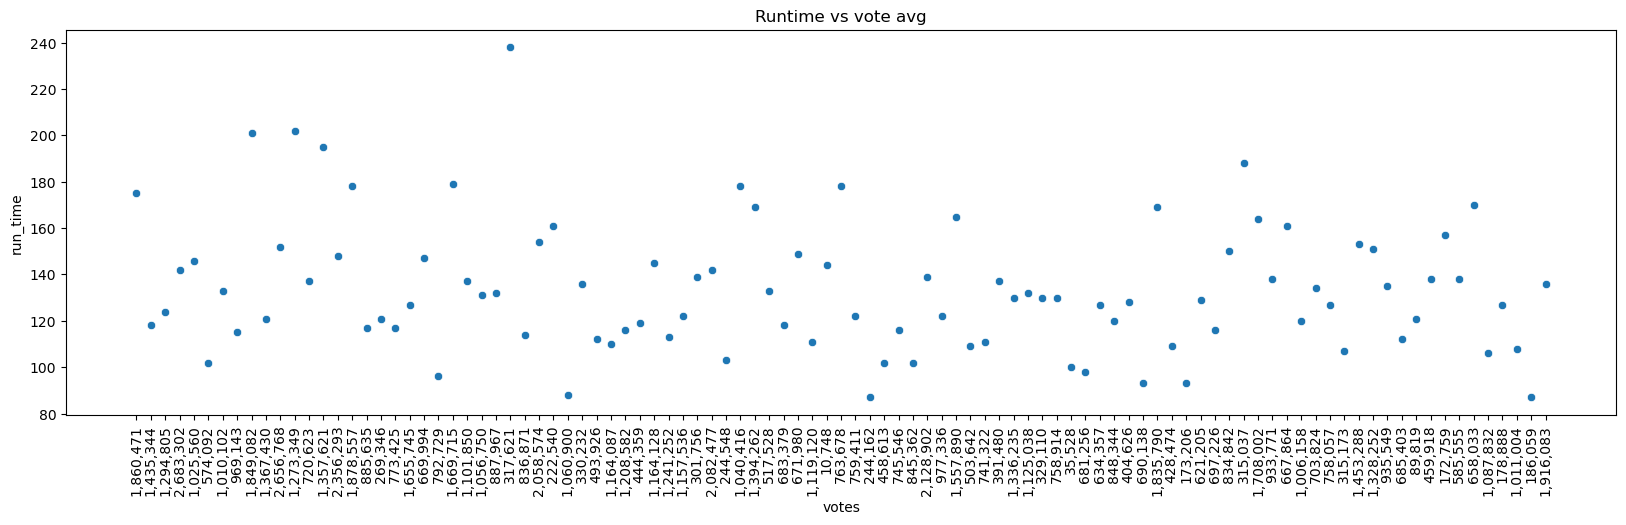

In [108]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=df['votes'], y=df["run_time"])
plt.title("Runtime vs vote avg")
plt.xticks(rotation=90)
plt.show()

# Average indicators "run_time", "imdb_rating" for all genres of films, sorted by rating

C:\Users\Hp\AppData\Local\Temp\ipykernel_5020\2719634870.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('genre')['run_time', 'imdb_rating'].agg('mean').sort_values(by='imdb_rating', ascending=False).plot(kind='bar',figsize=(20,20))


<Axes: xlabel='genre'>

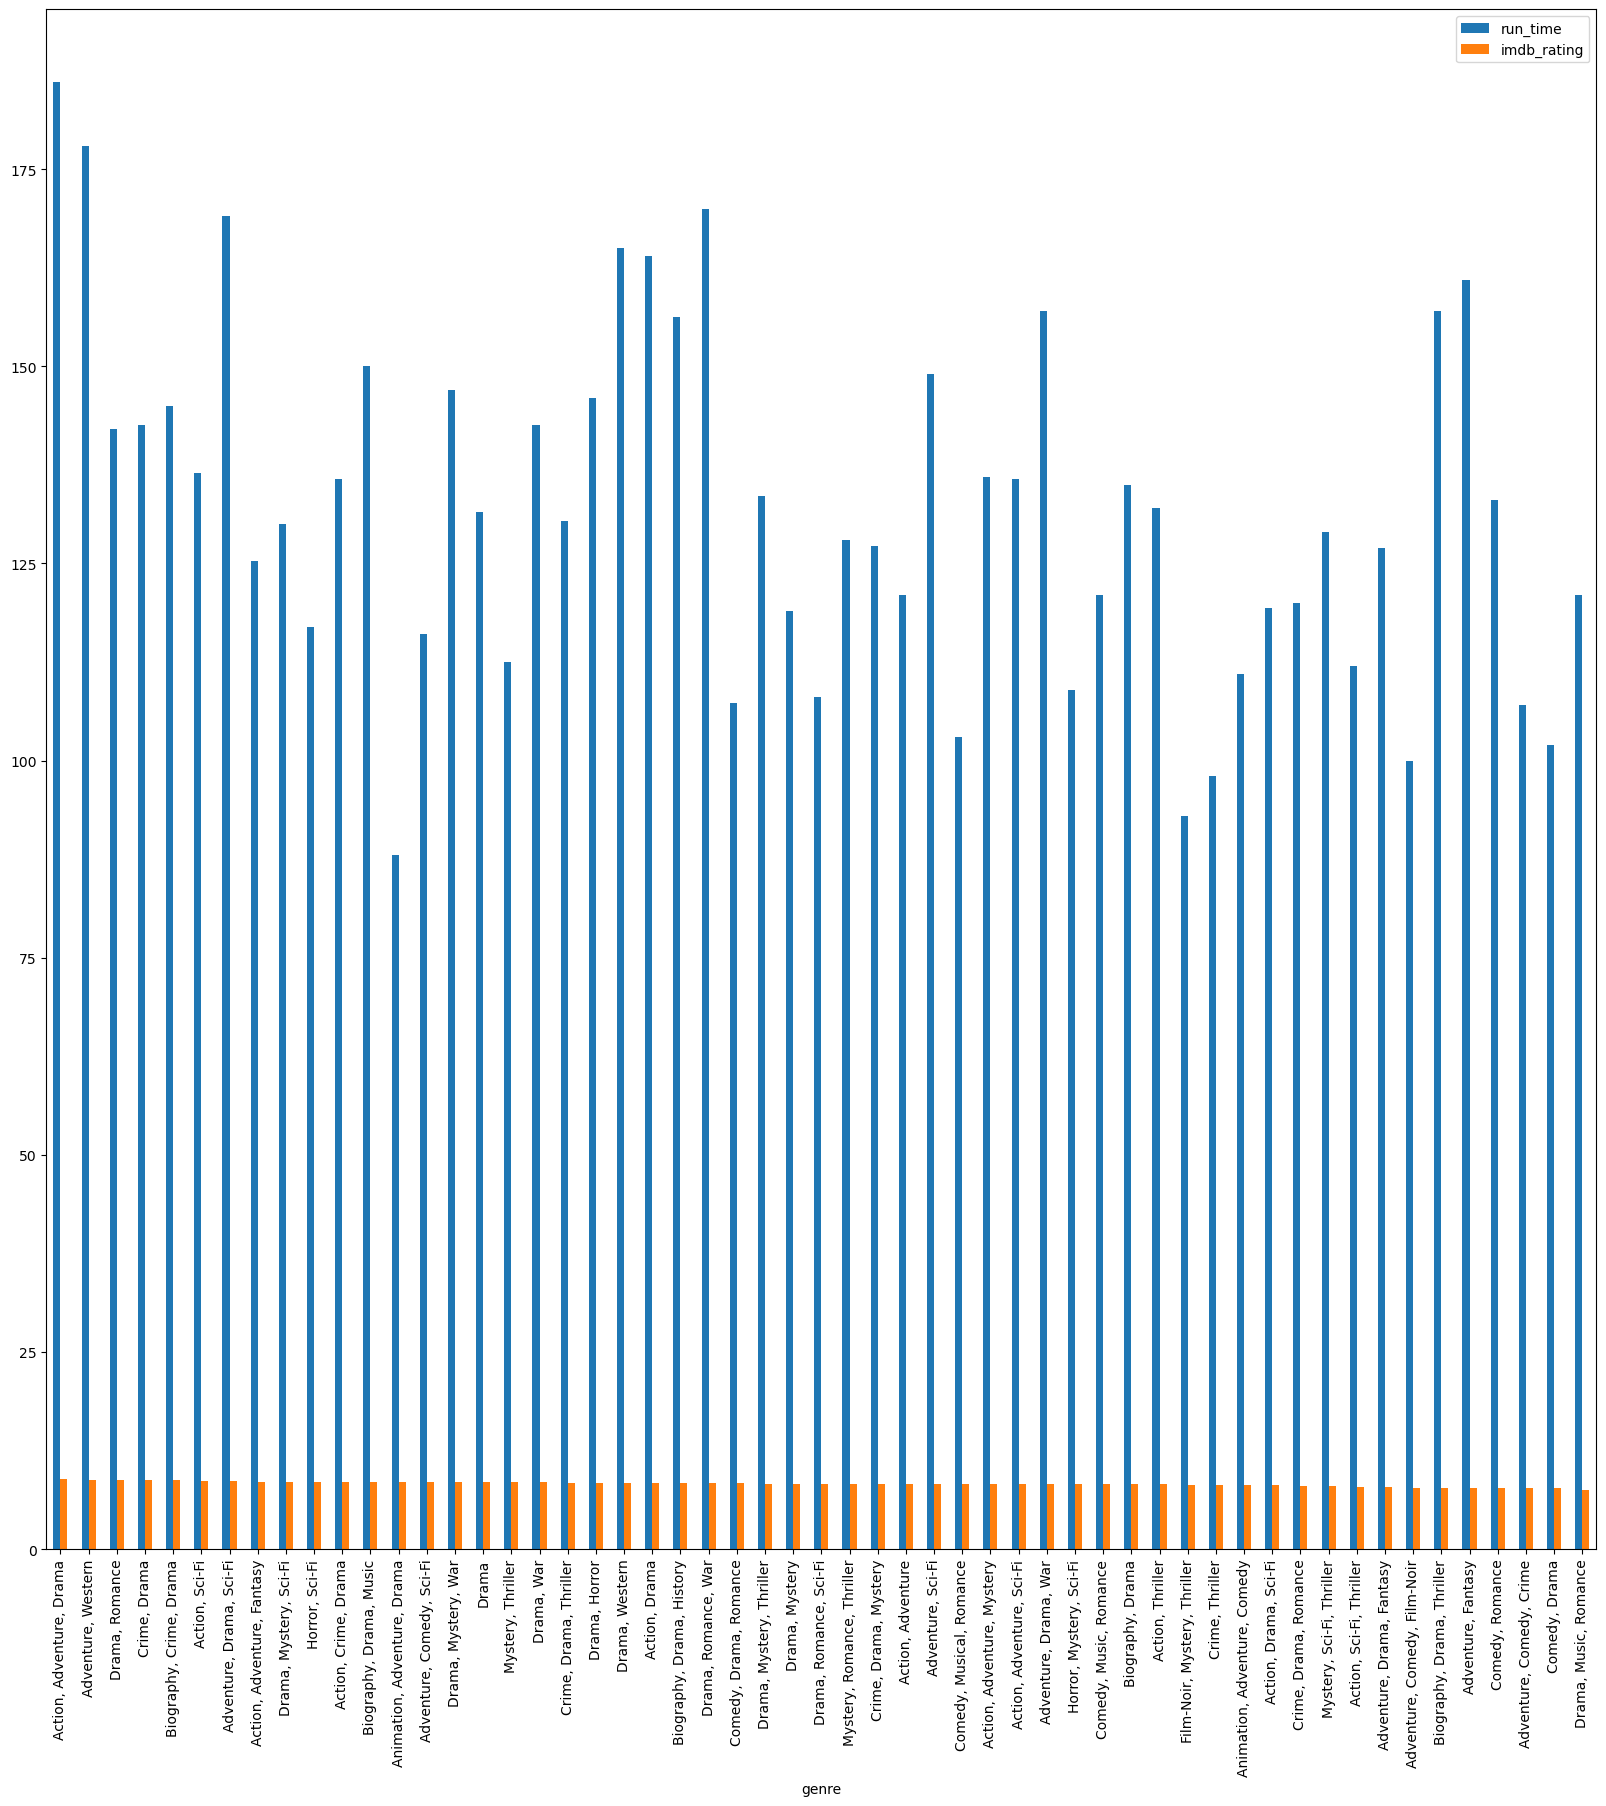

In [109]:
df.groupby('genre')['run_time', 'imdb_rating'].agg('mean').sort_values(by='imdb_rating', ascending=False).plot(kind='bar',figsize=(20,20))

# WordCloud

In [110]:
from wordcloud import WordCloud,STOPWORDS

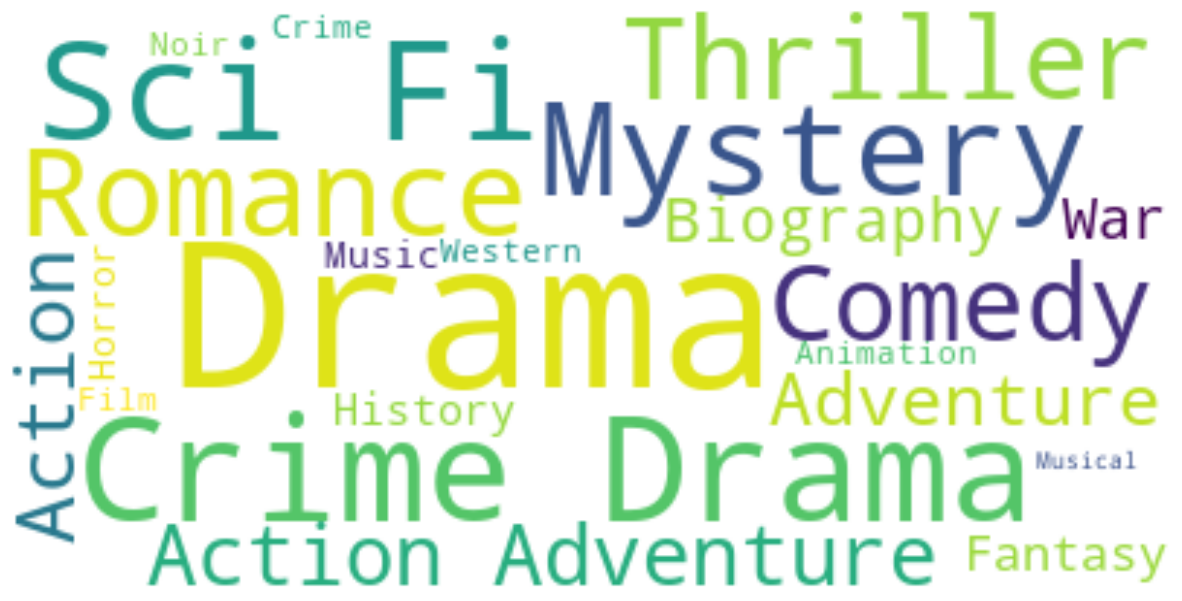

In [111]:
stopwords = set(STOPWORDS)
text = " ".join(df['genre'])

plt.figure( figsize=(15,10))
wordcloud = WordCloud(background_color = 'white',stopwords=stopwords, max_words=100, max_font_size=70, random_state=100).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');
plt.show();

# Thank You !